In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

C:\Users\computer\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Generating a larger dataset with 1000 rows
n = 1000  # Number of rows

house_size = np.random.uniform(1000, 5000, n)  # House size in sq ft
bedrooms = np.random.randint(1, 6, n)  # Number of bedrooms
bathrooms = np.random.randint(1, 5, n)  # Number of bathrooms
age_of_house = np.random.uniform(0, 100, n)  # Age of house in years
distance_to_city = np.random.uniform(1, 50, n)  # Distance to city in km

# Linear relationship with some noise for price
price = (house_size * 150) + (bedrooms * 25000) - (age_of_house * 1000) - (distance_to_city * 3000) + np.random.normal(0, 50000, n)

# Create a DataFrame
data = pd.DataFrame({
    'House Size': house_size,
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'Age of House': age_of_house,
    'Distance to City': distance_to_city,
    'Price': price
})


data.to_csv('House_prediction.csv',index=False)


In [3]:
data.head()

,House Size,Bedrooms,Bathrooms,Age of House,Distance to City,Price
0,3402.871739,1,1,49.206163,21.145606,369528.314929
1,2543.857405,2,2,95.472405,14.683955,243850.379337
2,3641.626577,1,1,40.248203,5.965466,604153.008624
3,1740.911243,3,1,84.883534,22.335460,231299.923721
4,1159.503688,4,2,15.492290,7.589342,255012.400154


In [4]:
# EDA

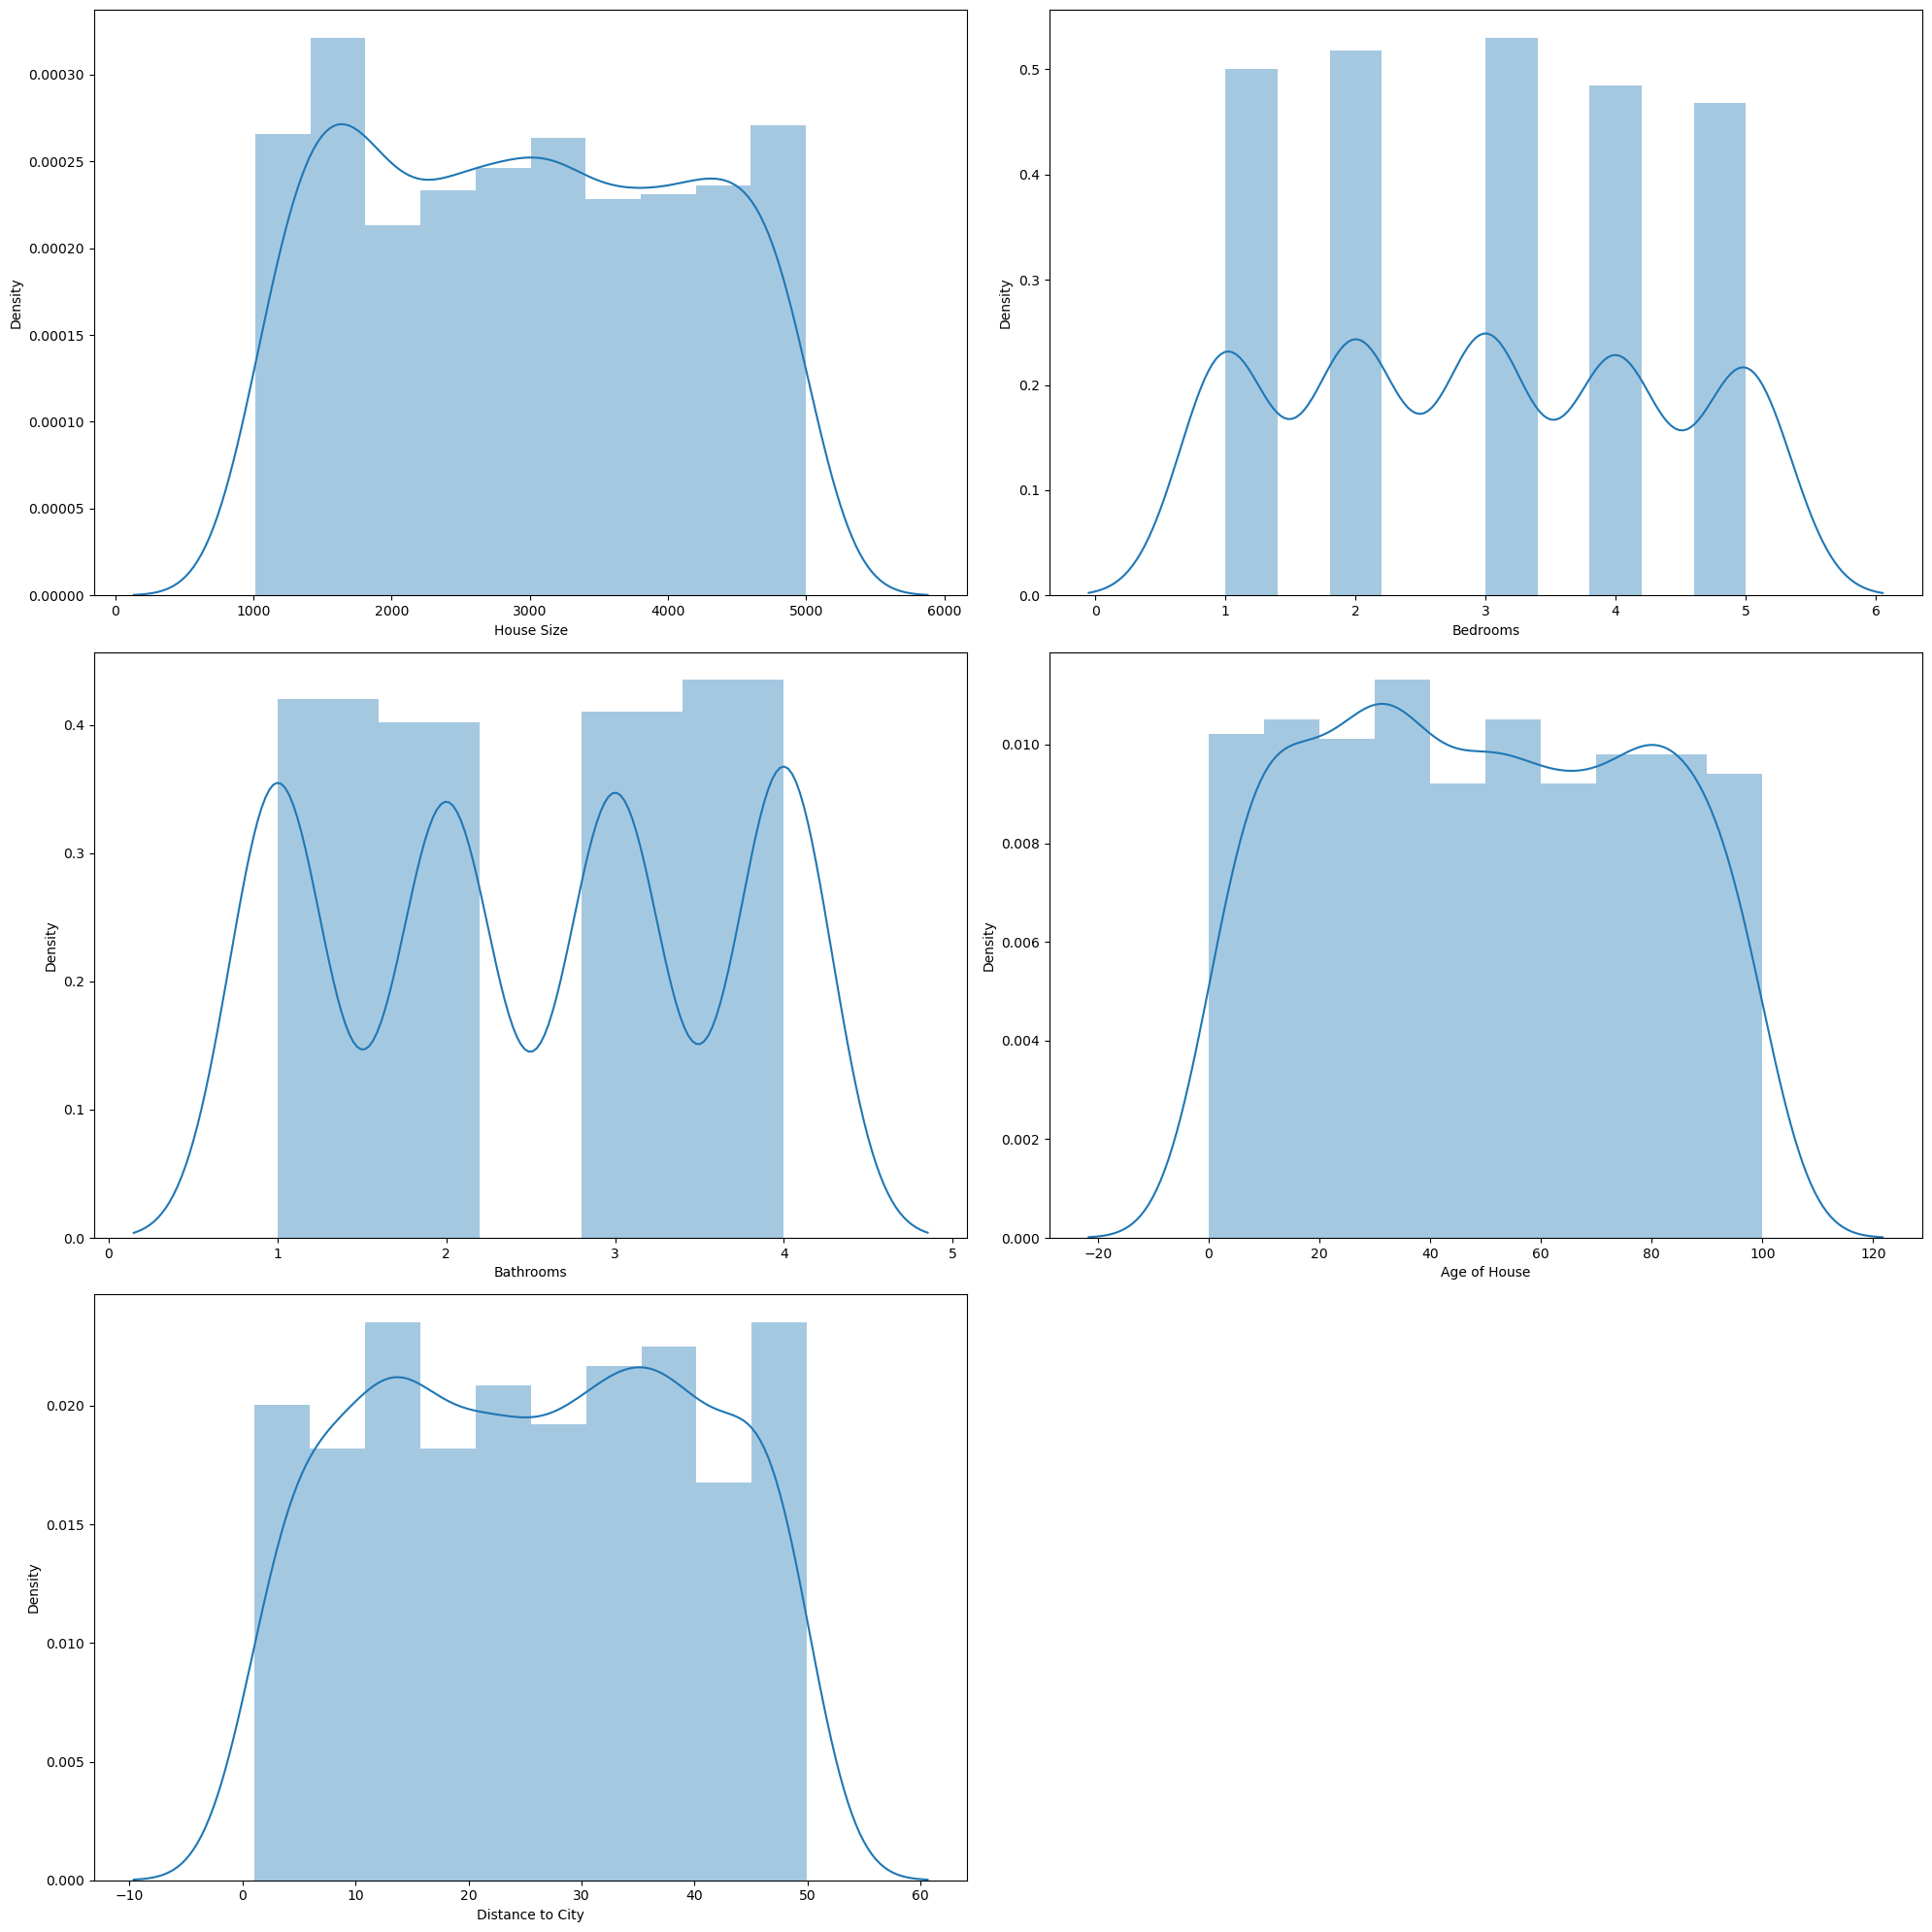

In [5]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data.drop('Price',axis=1):
    if plotnumber <=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [6]:
data.isnull().sum()

House Size          0
Bedrooms            0
Bathrooms           0
Age of House        0
Distance to City    0
Price               0
dtype: int64

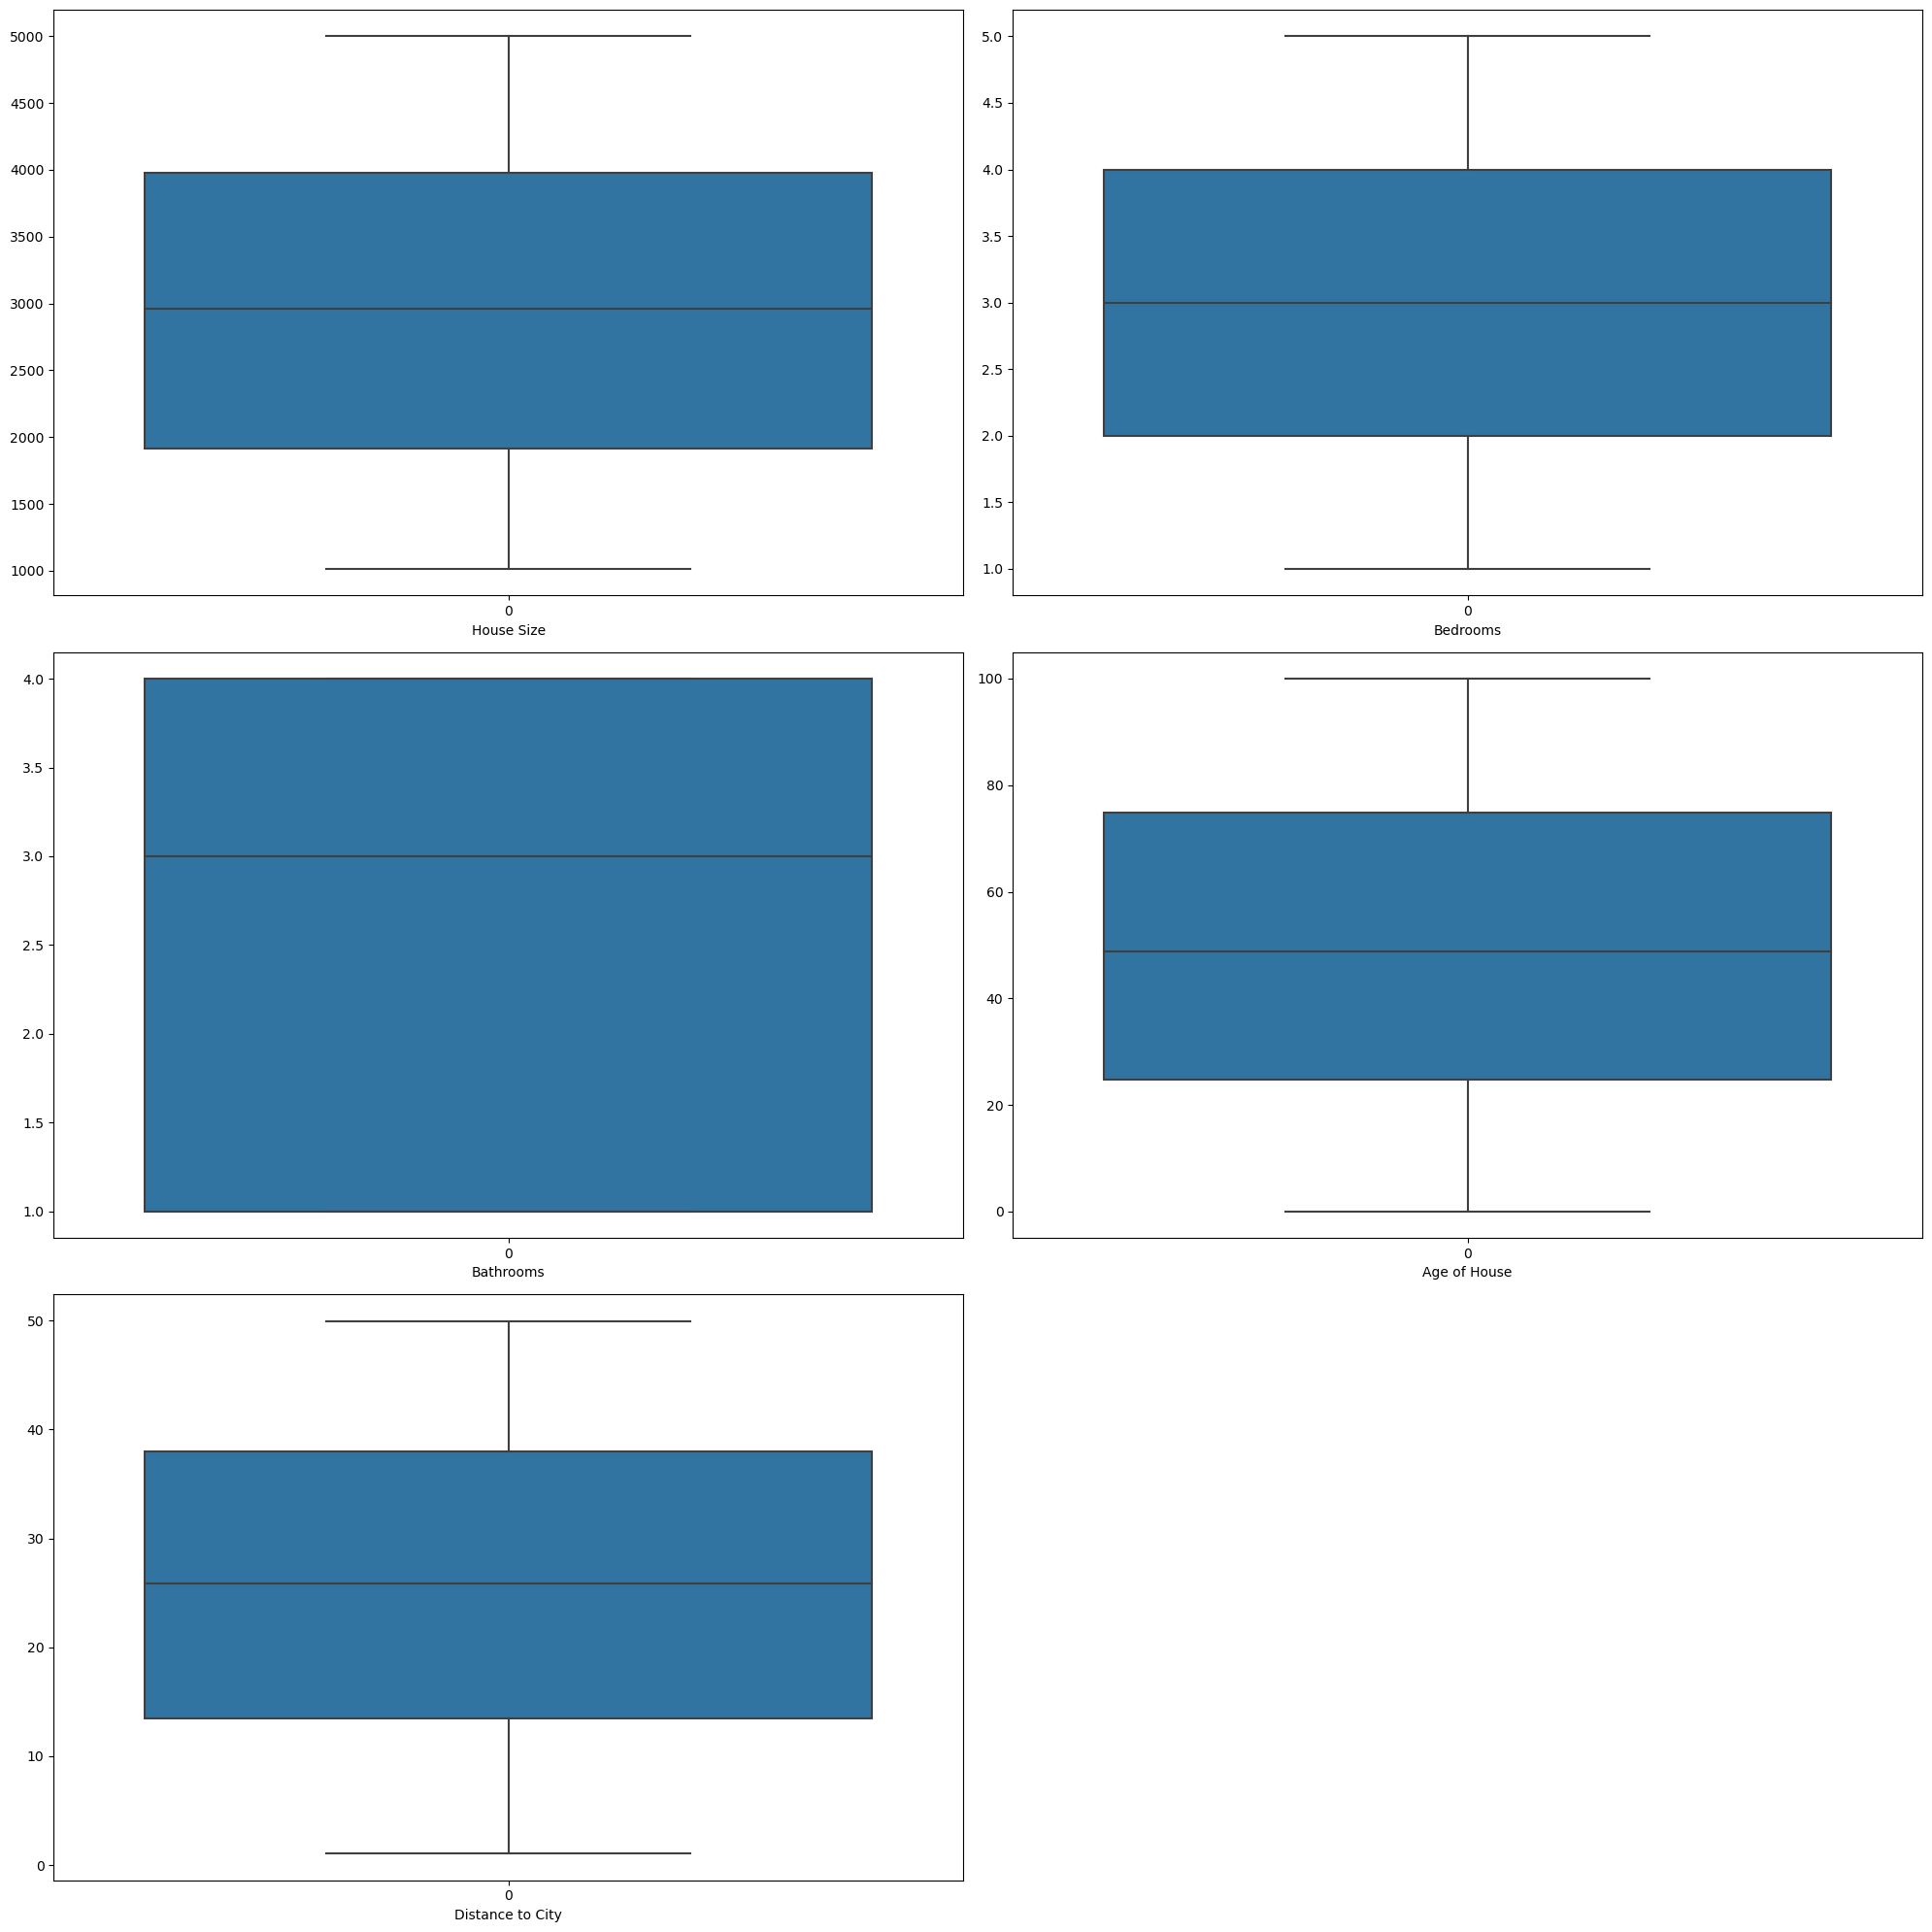

In [7]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data.drop('Price',axis=1):
    if plotnumber <=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [8]:
x = data.drop('Price',axis=1)

In [9]:
x

,House Size,Bedrooms,Bathrooms,Age of House,Distance to City
0,3402.871739,1,1,49.206163,21.145606
1,2543.857405,2,2,95.472405,14.683955
2,3641.626577,1,1,40.248203,5.965466
3,1740.911243,3,1,84.883534,22.335460
4,1159.503688,4,2,15.492290,7.589342
...,...,...,...,...,...
995,1923.913367,3,2,41.680195,25.271392
996,3847.302187,1,1,66.936754,4.660226
997,1892.463414,3,4,38.031057,28.958367
998,3975.640517,3,1,92.592344,47.256667


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scale = sc.fit_transform(x)

In [11]:
x_scale

array([[ 3.67746513e-01, -1.40520990e+00, -1.34220062e+00,
        -6.90523100e-04, -3.29580174e-01],
       [-3.67961687e-01, -6.88631676e-01, -4.56844009e-01,
         1.60489288e+00, -7.86558931e-01],
       [ 5.72229588e-01, -1.40520990e+00, -1.34220062e+00,
        -3.11559765e-01, -1.40314511e+00],
       ...,
       [-9.25852145e-01,  2.79465509e-02,  1.31386921e+00,
        -3.88501648e-01,  2.22951381e-01],
       [ 8.58297916e-01,  2.79465509e-02, -1.34220062e+00,
         1.50494572e+00,  1.51703789e+00],
       [-1.27676788e+00,  7.44524778e-01,  1.31386921e+00,
         1.01929628e+00,  1.40177033e+00]])

In [12]:
y=data['Price']

In [13]:
y

0      369528.314929
1      243850.379337
2      604153.008624
3      231299.923721
4      255012.400154
           ...      
995    285001.308294
996    513551.617886
997    283626.839939
998    405976.930875
999     50519.407864
Name: Price, Length: 1000, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2,random_state=42)


In [15]:
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [16]:
y_predict = LR.predict(x_test)

In [17]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [18]:
r2_score(y_predict,y_test)

0.9245222582826146

In [19]:
mse = mean_squared_error(y_predict,y_test)

In [20]:
mae = mean_absolute_error(y_predict,y_test)
mae

40262.30291165374

In [21]:
rmse = np.sqrt(mean_squared_error(y_predict,y_test))
rmse

51087.625328208596

In [22]:
import pickle

In [23]:
with open('model.pkl','wb') as file:
    pickle.dump(LR,file)

In [27]:
data.columns

Index(['House Size', 'Bedrooms', 'Bathrooms', 'Age of House',
       'Distance to City', 'Price'],
      dtype='object')